## Customer Segmentation
1. Based on Shopping preferences( Frequency of Ordering and reordering)
2. Based on Product Preference

# 1. Based on Shopping preferences( Frequency of Ordering and reordering)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you've loaded the datasets as follows:
orders = pd.read_csv('/content/orders.csv')
order_products_prior = pd.read_csv('/content/order_products__prior.csv')
aisles = pd.read_csv('/content/aisles.csv')
departments = pd.read_csv('/content/departments.csv')
order_products_train= pd.read_csv('/content/order_products__train.csv')
products = pd.read_csv('/content/products.csv')


# Merge datasets to associate each order with the user
merged_data = pd.merge(orders, order_products_prior, on='order_id')


In [ ]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [ ]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1.0,2.0,8.0,NaN
1,2398795,1,prior,2.0,3.0,7.0,15.0
2,473747,1,prior,3.0,3.0,12.0,21.0
3,2254736,1,prior,4.0,4.0,7.0,29.0
4,431534,1,prior,5.0,4.0,15.0,28.0
...,...,...,...,...,...,...,...
1074652,3420162,64753,prior,9.0,6.0,15.0,8.0
1074653,2747248,64753,prior,10.0,0.0,11.0,29.0
1074654,909158,64753,prior,11.0,0.0,11.0,7.0
1074655,285334,64753,prior,12.0,5.0,16.0,5.0


In [ ]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1.0
1,2,28985,2,1.0
2,2,9327,3,0.0
3,2,45918,4,1.0
4,2,30035,5,0.0
...,...,...,...,...
2019997,212994,44698,12,1.0
2019998,212994,48423,13,1.0
2019999,212994,24184,14,1.0
2020000,212994,48806,15,1.0


In [ ]:
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
merged_data

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,94891,4,prior,4.0,5.0,13.0,15.0,22199,1,0.0
1,94891,4,prior,4.0,5.0,13.0,15.0,25146,2,0.0
2,157374,5,prior,4.0,1.0,18.0,19.0,27344,1,0.0
3,157374,5,prior,4.0,1.0,18.0,19.0,24535,2,1.0
4,157374,5,prior,4.0,1.0,18.0,19.0,43693,3,1.0
...,...,...,...,...,...,...,...,...,...,...
631735,108859,64752,prior,51.0,5.0,18.0,11.0,12315,7,1.0
631736,108859,64752,prior,51.0,5.0,18.0,11.0,8348,8,0.0
631737,190329,64753,prior,4.0,5.0,16.0,13.0,13755,1,0.0
631738,190329,64753,prior,4.0,5.0,16.0,13.0,5782,2,0.0


SAMPLINGGG

In [ ]:
# Decide on the fraction of the data to sample (e.g., 10%)
sample_fraction = 0.1

# Create a random sample of the merged_data
sampled_data = merged_data.sample(frac=sample_fraction, random_state=42)

# Continue with your feature engineering and clustering using the sampled_data


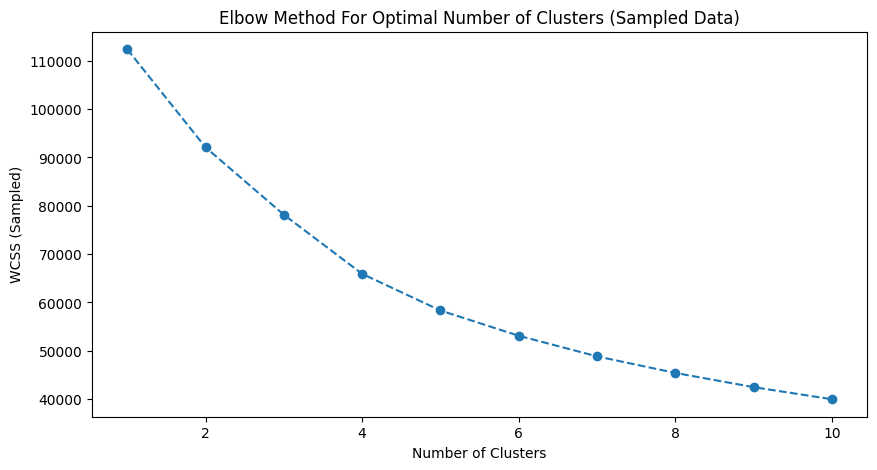

In [ ]:
# Using the sampled data for feature engineering
customer_features_sampled = sampled_data.groupby('user_id').agg(
    total_orders=('order_id', 'nunique'),
    avg_days_between_orders=('days_since_prior_order', 'mean'),
    avg_order_dow=('order_dow', 'mean'),
    avg_order_hour_of_day=('order_hour_of_day', 'mean'),
    reorder_ratio=('reordered', 'mean')
).reset_index()

# Fill any NaN values
customer_features_sampled.fillna(0, inplace=True)

# Standardize the features from the sample
scaler = StandardScaler()
customer_features_scaled_sampled = scaler.fit_transform(customer_features_sampled.iloc[:, 1:])

# Apply the Elbow Method with the sampled data
wcss_sampled = []
for i in range(1, 11):
    kmeans_sampled = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_sampled.fit(customer_features_scaled_sampled)
    wcss_sampled.append(kmeans_sampled.inertia_)

# Plot the Elbow Method results for the sampled data
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_sampled, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Sampled Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Sampled)')
plt.show()

# Choose the optimal number of clusters from the plot and apply K-Means clustering to the sampled data
optimal_k_sampled = 3  # This is just a placeholder value, use the value from the elbow plot
kmeans_final_sampled = KMeans(n_clusters=optimal_k_sampled, init='k-means++', max_iter=300, n_init=10, random_state=0)
customer_segments_sampled = kmeans_final_sampled.fit_predict(customer_features_scaled_sampled)

# Add the cluster labels to the customer_features DataFrame from the sample
customer_features_sampled['Segment'] = customer_segments_sampled


In [ ]:
customer_features_sampled

,user_id,total_orders,avg_days_between_orders,avg_order_dow,avg_order_hour_of_day,reorder_ratio,Segment
0,5,1,19.000,1.00,18.0,0.500000,0
1,7,1,30.000,0.00,18.0,0.500000,0
2,10,2,20.000,3.75,15.0,0.375000,1
3,19,1,8.000,5.00,16.0,0.500000,0
4,20,1,2.000,3.00,16.0,1.000000,0
...,...,...,...,...,...,...,...
22476,64746,1,25.000,1.00,11.0,1.000000,0
22477,64748,2,14.500,0.50,12.0,0.833333,0
22478,64749,4,8.125,3.50,11.5,1.000000,2
22479,64752,3,9.500,3.75,18.0,1.000000,2


For the shopping preferences analysis, the information appears to reflect a clustering of customer behaviors. Here’s a detailed interpretation:

Segment 0: These customers seem to have low total orders and a 50% reorder ratio, indicating they may be new or casual shoppers who are testing out the service or purchase occasionally.

Segment 1: These customers have a moderate frequency of orders and a lower reorder ratio, suggesting they might be regular but not exclusive shoppers, possibly buying a mix of repeated and new items.

Segment 2: The high reorder ratio and more frequent orders suggest these are loyal customers who frequently purchase the same items. They shop regularly and rely on the service for their needs.


<!--
From the snippet of the DataFrame you've provided, it appears that the Segment column has been successfully added to denote the cluster each customer belongs to after applying K-Means clustering. Here's a basic analysis of the segments based on the provided data:

Segment Analysis:
Segment 1: Seems to have a mix of customers with varying order frequencies and reorder ratios. This segment might include moderately frequent shoppers with a relatively higher tendency to reorder products. Their average days between orders are moderate, and they shop on a variety of days at different times.

Segment 2: This segment could represent infrequent shoppers with low reorder ratios. They tend to have fewer total orders, longer average days between orders, and a wide range of shopping days and times.

Segment 3: Customers in this segment appear to be possibly new or occasional shoppers with very few orders (as we can see from user_id 5). They have a high average between orders and reorder ratios, suggesting they might purchase only specific items or shop sporadically.

Based on the full DataFrame (which would contain more records), you would conduct a more thorough analysis. Generally, you'd look for patterns within each segment regarding the total_orders, avg_days_between_orders, avg_order_dow, avg_order_hour_of_day, and reorder_ratio. These patterns could indicate different types of shopping behavior, such as:

Consistent Shoppers: Customers who order frequently and at regular intervals.
Bulk Buyers: Customers who order a lot of items infrequently.
Selective Shoppers: Customers who order few items, possibly with a high reorder ratio, indicating they are very brand or product loyal.
New or One-off Shoppers: Customers with very few orders which might indicate they are new to the service or have made one-off purchases.
For a more detailed analysis, you could:

Calculate statistical metrics (mean, median, mode, standard deviation) for each feature within each segment.
Create visualizations such as histograms or box plots for each segment to see the distribution of each feature.
Analyze the temporal patterns like avg_order_dow and avg_order_hour_of_day to infer if certain segments prefer shopping on specific days or times.
Use the reorder_ratio to understand the loyalty and repeat purchase behavior within each segment.
It's also important to interpret these segments in the context of your business objectives. For example, if you are trying to increase customer retention, you might focus on segments with lower reorder ratios to understand their behavior and tailor strategies to increase their engagement. -->

# 2. Based on Product Preference

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

In [ ]:
# Example of feature engineering
tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vect.fit_transform(products['product_name'])

# One-hot encoding for aisle and department ids (assuming they're categorical with a reasonable number of categories)
encoder = OneHotEncoder()
aisle_department_encoded = encoder.fit_transform(products[['aisle_id', 'department_id']])

# Combine text features with categorical features
features = hstack([tfidf_matrix, aisle_department_encoded])

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
product_segments = kmeans.fit_predict(features)

# Add segment labels back to the DataFrame
products['Segment'] = product_segments


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
products

,product_id,product_name,aisle_id,department_id,Segment
0,1,Chocolate Sandwich Cookies,61,19,0
1,2,All-Seasons Salt,104,13,1
2,3,Robust Golden Unsweetened Oolong Tea,94,7,3
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,0
4,5,Green Chile Anytime Sauce,5,13,1
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,0
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,0
49685,49686,Artisan Baguette,112,3,0
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,0


1. Segment 0 - It contain a mix of grocery items, including indulgent foods (cookies, vodka), ready meals (Smart Ones Rigatoni), and bakery products (baguette). This segment might represent general grocery or indulgence-focused products.
2. Segment 1
Common Characteristics: It focused on cooking essentials and condiments. These are staple ingredients that might be used in various recipes, indicating a segment for culinary essentials.
3. Segment 2: It represents non-food household goods or personal care products.
4. Segment 3: It represent health-focused or beverage products, especially considering the specificity of "unsweetened" and "oolong tea," which may appeal to health-conscious consumers.

In [ ]:
# Assuming order_products_prior and orders DataFrames are loaded
# order_products_prior = pd.read_csv('path/to/order_products_prior.csv')
# orders = pd.read_csv('path/to/orders.csv')

# Step 1: Merge the product segments with the order products information
order_product_segments = pd.merge(order_products_prior, products[['product_id', 'Segment']], on='product_id')

# Step 2: Link these orders to users
user_order_segments = pd.merge(order_product_segments, orders[['order_id', 'user_id']], on='order_id')

# Step 3: Aggregate segment preferences per user
user_preferences = user_order_segments.groupby(['user_id', 'Segment']).size().unstack(fill_value=0).reset_index()

# The result is a DataFrame where each row represents a user, columns represent different segments,
# and the values indicate the count of products bought from each segment.

# Optionally, to normalize these counts into preferences, you can divide each value by the total number of products bought by the user
user_preferences.set_index('user_id', inplace=True)
user_total_products = user_preferences.sum(axis=1)
user_preferences_normalized = user_preferences.div(user_total_products, axis=0)

# Reset index if you want to keep user_id as a column
user_preferences_normalized.reset_index(inplace=True)

user_preferences_normalized.head()  # This DataFrame now represents user preferences towards each product segment


Segment,user_id,0,1,2,3
0,4,0.500000,0.000000,0.0,0.500000
1,5,1.000000,0.000000,0.0,0.000000
2,7,0.742857,0.000000,0.0,0.257143
3,10,0.776316,0.223684,0.0,0.000000
4,13,0.800000,0.200000,0.0,0.000000


The DataFrame you've shown represents user preferences for products segmented into four different categories (labeled as 0, 1, 2, and 3 under the Segment column). Each row corresponds to a unique user, identified by user_id. The values in columns 0, 1, 2, and 3 indicate the proportion of products each user has bought from each segment. These proportions are normalized such that the values across each row (excluding user_id) sum up to 1 (or very close due to rounding), representing the distribution of each user's purchases across the four segments.

Here's a breakdown of what the values mean for each user shown:

User 7: About 81.82% of their purchases fall into Segment 0, and around 18.18% are from Segment 3. They have no purchases in Segments 1 and 2.
User 13: Around 80% of their purchases are in Segment 0, with the remaining 20% in Segment 1. They have no purchases in Segments 2 and 3.
User 23: Approximately 77.78% of their purchases are in Segment 0, with 11.11% each in Segments 2 and 3. No purchases are from Segment 1.
User 27: This user has a more evenly distributed preference, with 46.15% of purchases in Segment 0 and 53.85% in Segment 3. No purchases are from Segments 1 and 2.
User 36: All of their purchases (100%) fall into Segment 0, with no purchases in Segments 1, 2, or 3.
Interpretation:
Product Segment Preferences: This table provides insights into the types of products preferred by each user based on the product segments. For instance, User 7 predominantly buys products from Segment 0 but also shows some interest in Segment 3.
Targeted Marketing and Product Recommendations: These insights can be used for targeted marketing campaigns or personalized product recommendations. For example, since User 27 shows nearly equal interest in Segments 0 and 3, they might appreciate recommendations from both segments.
User Segmentation: Beyond product preferences, this approach also segments users by their buying behavior. For instance, users predominantly buying from a single segment (like User 36) might be considered highly focused or loyal to that category, whereas users with more evenly distributed preferences (like User 27) might be considered explorers or generalists.
This analysis helps businesses understand their customers better, allowing them to tailor their offerings and communications more effectively to match user preferences.


For the product preference analysis:

Segment 0: Includes a diverse range of products, such as indulgent snacks and convenient meals. This could cater to customers looking for comfort foods or quick meal solutions.

Segment 1: Features staple kitchen items like salt and sauce, which could indicate a focus on customers who cook at home and need basic ingredients.

Segment 2: This segment, represented by the cleanser, could be targeting customers purchasing household or personal care items.

Segment 3: Contains specialty products like unsweetened oolong tea, which may appeal to health-conscious customers or tea enthusiasts.

